In [ ]:
#Importation des bibliothèques nécésssaires
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#Importation des fonctions utiles dans ce projet
sys.path.append('../Functions')
from data_load import load_csv
from plot import histplot
from data_prep import enco_scale

In [ ]:
#Chargement des données
path_file='../Données/stroke_data.csv'
df=load_csv(path_file)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Vérification des valeurs manquantes**

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


les valeurs manquantes ne se trouvent que dans le colonne bmi

In [ ]:
#Remplissage des NAs dans la colonne bmi par la mediane
df['bmi'].fillna(df['bmi'].median(), inplace=True)

<ipython-input-7-4a43db8ae24e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [ ]:
#Vérification du résultat de remplissage
df['bmi'].isnull().sum()

0

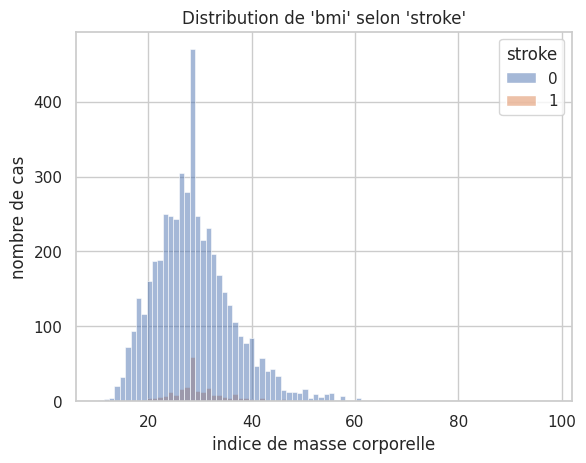

In [ ]:
#Analyse de l'effetde l'indice de masse corporelle sur l'AVC
histplot(df, 'bmi', 'stroke', 'indice de masse corporelle')
plt.savefig('../Figures/Histo_bmi_vs_stroke.png')

In [ ]:
#inspection de la variable 'gender'
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


En comptant des differents genre de sexe, on voit que la catégorie 'Other' nee se présente qu'une seule fois, ce qui peut perturber les modèles, et en plus elle n'a pratiquement aucun apport statistique significatif.
***Décision.... Suppression de cette catégorie***

In [ ]:
df=df[df['gender']!='Other']

In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115


**Préparation des données**

In [ ]:
#Encodage + Standarisation
X_scaled, Y=enco_scale(df, 'stroke', 'id')

In [ ]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.050758,-0.328637,4.184599,2.702515,0.984374,1.189791,0.723678,-0.065763,0.864444,-0.436931,-0.394157,0.983884,2.186187,-0.766893,-0.427363
1,0.785653,-0.328637,-0.238972,2.128212,-0.056215,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
2,1.625151,-0.328637,4.184599,-0.014380,0.464079,1.189791,0.723678,-0.065763,0.864444,-0.436931,-0.394157,-1.016380,-0.457417,1.303962,-0.427363
3,0.255444,-0.328637,-0.238972,1.443466,0.724226,-0.840484,0.723678,-0.065763,0.864444,-0.436931,-0.394157,0.983884,-0.457417,-0.766893,2.339933
4,1.580967,3.042866,-0.238972,1.509732,-0.576509,-0.840484,0.723678,-0.065763,-1.156812,2.288689,-0.394157,-1.016380,-0.457417,1.303962,-0.427363


In [ ]:
#Enregistrement des données pretes pour la création du modele
chemin_X_scaled='../Données/X_scaled.csv'
X_scaled.to_csv(chemin_X_scaled, index=False)
chemin_Y='/../Données/Y.csv'
Y = pd.Series(Y, name='stroke')  # remplace "cible" par le vrai nom si tu veux
Y.to_csv(chemin_Y, index=False)
